# SD212: Graph Learning
## Lab 1: Graph Structure

In this lab, you will check some key properties of real graphs:
* the [friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox),
* the [power-law](https://en.wikipedia.org/wiki/Power_law#Power-law_probability_distributions) of degrees,
* the [small-world](https://en.wikipedia.org/wiki/Small-world_network) property,
* the tendency to [cluster](https://en.wikipedia.org/wiki/Clustering_coefficient).

## Import

In [1]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt

In [9]:
from sknetwork.data import load_netset, erdos_renyi
from sknetwork.path import get_distances, get_shortest_path
from sknetwork.topology import get_clustering_coefficient
from sknetwork.utils import get_degrees, get_neighbors, directed2undirected

## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paris.fr) collection for details):
* Openflights (graph)
* WikiVitals (directed graph)
* Cinema (bipartite graph)

In [3]:
openflights = load_netset('openflights')

Parsing files...
Done.


In [4]:
wikivitals = load_netset('wikivitals')

Parsing files...
Done.


In [5]:
cinema = load_netset('cinema')

Parsing files...
Done.


In [6]:
dataset = openflights

In [7]:
# adjacency matrix
adjacency = dataset.adjacency

In [8]:
adjacency

<3097x3097 sparse matrix of type '<class 'numpy.int64'>'
	with 36386 stored elements in Compressed Sparse Row format>

## 1. Friendship paradox

We first focus on the friendship paradox. We consider the Openflights dataset.

## To do

* Sample 100 random nodes. Compute their average degree.
* Sample 100 random neighbors of random nodes. Compute their average degree.
* Conclude.

In [9]:
rand_idx = np.random.randint(0, adjacency.shape[0], 100)

In [10]:
degrees = get_degrees(adjacency)
sample = degrees[rand_idx]
deg_avg = sample.mean()
deg_avg

11.01

In [11]:
deg_neigh_avg = list()
for i in rand_idx:
    neighbors = get_neighbors(adjacency, i)
    rand_neigh = np.random.choice(neighbors)
    deg_neigh_avg.append(degrees[rand_neigh])
deg_avg_2 = np.mean(deg_neigh_avg)
deg_avg_2

56.33

The friendship paradox is clear.

## 2. Power-law degrees

We now focus on the degree distribution.

We consider the empirical distributions of:
* degrees in the Openflights graph,
* in-degrees and out-degrees in the WikiVitals graph.

## To do

For each of these distributions:
* Plot the [tail distribution](https://en.wikipedia.org/wiki/Cumulative_distribution_function#Complementary_cumulative_distribution_function_(tail_distribution)) in log-log scale.
* Conclude: do you consider that these are power-law graphs?

In [12]:
def plot_loglog(degrees):
    """Plot the degree distribution in log-log scale and compare with that of a random graph.
    
    Parameters
    ----------
    degrees : array
        vector of degrees of the graph.
    """
    n = len(degrees)
    # comparison with a random graph
    p = np.sum(degrees) / n / (n-1) # link probability
    adjacency_random = erdos_renyi(n, p)
    degrees_random = get_degrees(adjacency_random)
    plt.loglog(np.sort(degrees), 1 - np.arange(n) / n, lw = 3, label='Real graph')
    plt.loglog(np.sort(degrees_random), 1 - np.arange(n) / n, lw = 3, label = 'Random graph')
    plt.xlabel('Degree')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

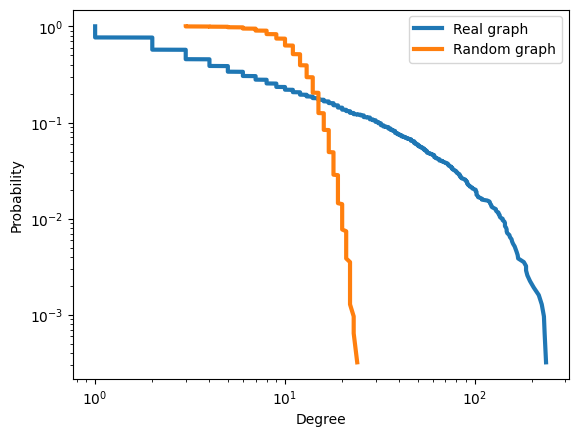

In [13]:
# For openflights
plot_loglog(get_degrees(openflights.adjacency))

In [14]:
# Out-degrees for WikiVitals
plot_loglog(get_degrees(wikivitals.adjacency))

KeyboardInterrupt: 

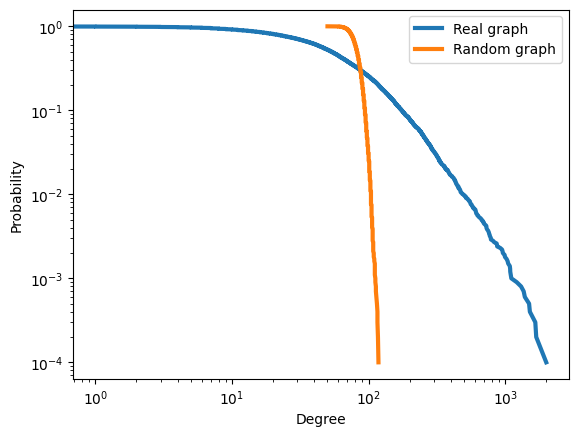

In [ ]:
# In-degrees for WikiVitals
plot_loglog(get_degrees(wikivitals.adjacency, transpose=True))

Both can be considered as power-law graphs, especially WikiVitals.

## 3. Small-world property

You will now make a few experiments highlighting the small-world property.

## To do

* Give a shortest path from [Plato](https://en.wikipedia.org/wiki/Plato) to [Platini](https://en.wikipedia.org/wiki/Michel_Platini) in WikiVitals.<br>
List the corresponding articles.

In [6]:
dataset = wikivitals
adjacency = dataset.adjacency
adjacency = 
names = wikivitals.names

In [7]:
france = (names == 'France').nonzero()[0][0]
france

3233

In [8]:
argentina = (names == 'Argentina').nonzero()[0][0]
argentina

624

In [10]:
n1 = get_neighbors(adjacency, france, transpose=True)
n2 = get_neighbors(adjacency, argentina, transpose=True)
c = 0
for i in range(len(n1)):
    if n1[i] in n2:
        c+=1
print(c)

312


In [ ]:
np.argwhere(names == 'Plato').ravel()

array([7108], dtype=int64)

In [ ]:
{i: name for i, name in enumerate(names) if 'Plato' in names[i] or 'Platini' in names[i]}

{564: 'Apology (Plato)',
 5893: 'Michel Platini',
 7108: 'Plato',
 7109: 'Platonic realism',
 7625: 'Republic (Plato)'}

In [ ]:
adjacency_shortest_path = get_shortest_path(adjacency, 7108)


In [ ]:
neighbors = get_neighbors(adjacency_shortest_path, 5893, transpose=True)
path = []
while 7108 not in neighbors:
    new_neighbor = np.random.choice(neighbors)
    neighbors = get_neighbors(adjacency_shortest_path, new_neighbor, transpose=True)
    path.append(new_neighbor)

In [ ]:
path

[2390, 6247]

In [7]:
from IPython.display import SVG
from sknetwork.visualization import visualize_graph

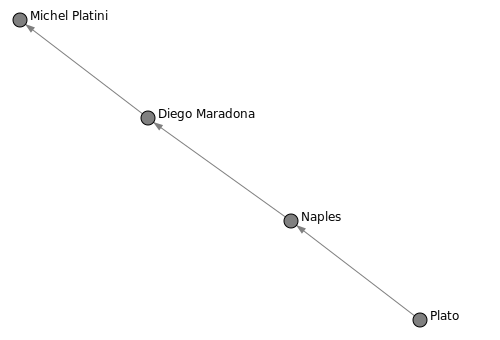

In [ ]:
indexes = path + [5893, 7108]
filtered_adj = adjacency_shortest_path[indexes, :][:, indexes]
image = visualize_graph(filtered_adj, names=names[indexes])
SVG(image)

## To do

* Which fraction of the airports can be reached from **Paris Charles de Gaulle** in 1, 2, 3 flights?
* Which fraction of the articles can be reached from **Paris** in 1, 2, 3 clicks on Wikipedia Vitals?

In [30]:
dataset = openflights
adjacency = dataset.adjacency
names = dataset.names

cdg = (names == 'Charles de Gaulle International Airport').nonzero()[0][0]
for i in range(6):
    print(f"Fraction of airports at distance {i+1} from CDG: {np.mean(get_distances(adjacency, cdg) <= i):.2f}")

Fraction of airports at distance 1 from CDG: 0.00
Fraction of airports at distance 2 from CDG: 0.08
Fraction of airports at distance 3 from CDG: 0.62
Fraction of airports at distance 4 from CDG: 0.91
Fraction of airports at distance 5 from CDG: 0.98
Fraction of airports at distance 6 from CDG: 1.00


In [32]:
dataset = wikivitals
adjacency = dataset.adjacency
names = dataset.names

paris = (names == 'Paris').nonzero()[0][0]
for i in range(4):
    print(f"Fraction of pages at distance {i+1} from Paris: {np.mean(get_distances(adjacency, paris) <= i):.2f}")

Fraction of pages at distance 1 from Paris: 0.00
Fraction of pages at distance 2 from Paris: 0.04
Fraction of pages at distance 3 from Paris: 0.68
Fraction of pages at distance 4 from Paris: 1.00


## To do

* Compute the [Bacon number](https://fr.wikipedia.org/wiki/Six_Degrees_of_Kevin_Bacon) of all actors (**without** building the co-starring actor graph).
* Plot the corresponding histogram.

In [19]:
dataset = cinema
# biadjacency matrix
biadjacency = dataset.biadjacency
movies = dataset.names_row
actors = dataset.names_col

for actor in actors:
    if 'Bacon' in actor:
        print(actor)
bacon = (actors == 'Kevin Bacon').nonzero()[0][0]
irina = (actors == 'Irina Petrescu').nonzero()[0][0]
d = get_distances(biadjacency, bacon)[1]
print(d)
print(d[irina])

Frank Bacon
Kevin Bacon
Lloyd Bacon
Irving Bacon
Max Bacon
David Bacon
[11 11  9 ... 11 13 19]
13


## 4. Clustering coefficient

Finally, we check the clustering property of real graphs (my friends tend to be friends).

## To do


* Compute the clustering coefficient of Openflights.
* Compare with that of a random graph of same size and same average degree.

In [ ]:
dataset = openflights
adjacency = dataset.adjacency

In [ ]:
get_clustering_coefficient(adjacency)